In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Load the dataset
dataset = pd.read_csv('C:/Users/gnsqu/Today-I-Learned/Data Analytics/Harry study/dataset for assignment 2.csv')


In [4]:
# Exploratory Data Analysis (EDA)
print(dataset.describe(include='all'))

            User ID Gender          Age Activity Level Location  App Sessions  \
count   5000.000000   5000  5000.000000           5000     5000   5000.000000   
unique          NaN      2          NaN              3        3           NaN   
top             NaN   Male          NaN       Moderate    Rural           NaN   
freq            NaN   2538          NaN           1734     1684           NaN   
mean    2500.500000    NaN    38.423600            NaN      NaN    124.366400   
std     1443.520003    NaN    12.160631            NaN      NaN     42.689317   
min        1.000000    NaN    18.000000            NaN      NaN     50.000000   
25%     1250.750000    NaN    28.000000            NaN      NaN     89.000000   
50%     2500.500000    NaN    39.000000            NaN      NaN    124.000000   
75%     3750.250000    NaN    49.000000            NaN      NaN    161.000000   
max     5000.000000    NaN    59.000000            NaN      NaN    199.000000   

        Distance Travelled 

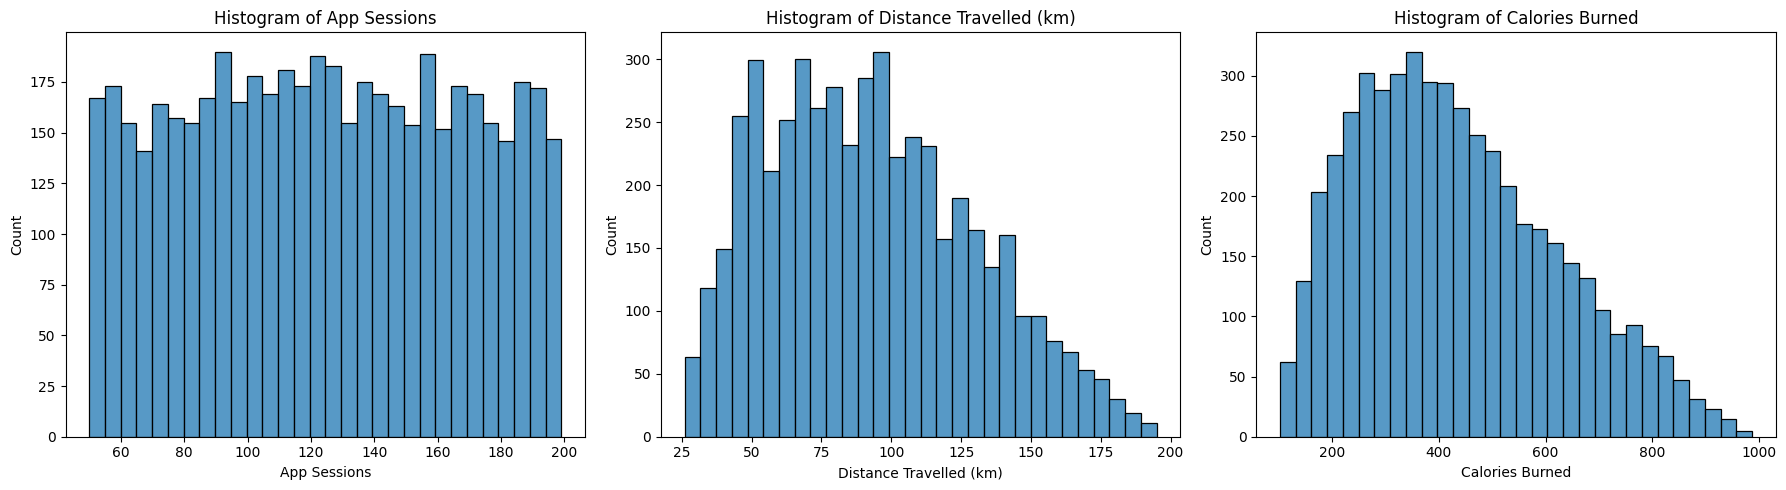

In [5]:
# Histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(dataset['App Sessions'], bins=30, ax=axes[0])
axes[0].set_title('Histogram of App Sessions')

sns.histplot(dataset['Distance Travelled (km)'], bins=30, ax=axes[1])
axes[1].set_title('Histogram of Distance Travelled (km)')

sns.histplot(dataset['Calories Burned'], bins=30, ax=axes[2])
axes[2].set_title('Histogram of Calories Burned')

plt.tight_layout()
plt.show()

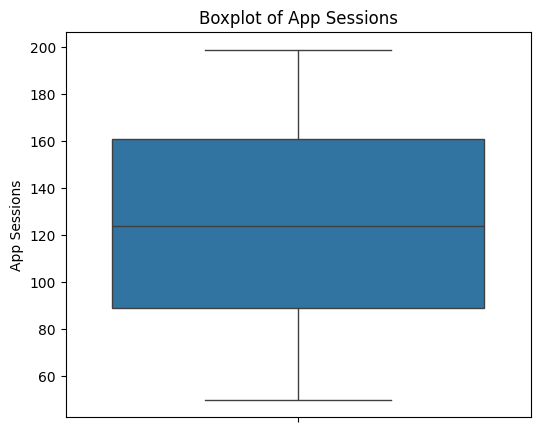

In [6]:
# Boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(y=dataset['App Sessions'])
plt.title('Boxplot of App Sessions')
plt.show()

In [7]:
# Prepare data for modeling
X = pd.get_dummies(dataset[['Age', 'Gender', 'Activity Level', 'Location', 'Distance Travelled (km)', 'Calories Burned']],
                   columns=['Gender', 'Activity Level', 'Location'])
y_regression = dataset['App Sessions']

In [8]:
# Regression Model
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = regressor.predict(X_test_reg)

In [9]:
# Regression Model Evaluation
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
print(f'MSE: {mse}, R²: {r2}')

MSE: 127.60128149758052, R²: 0.9314430758953539


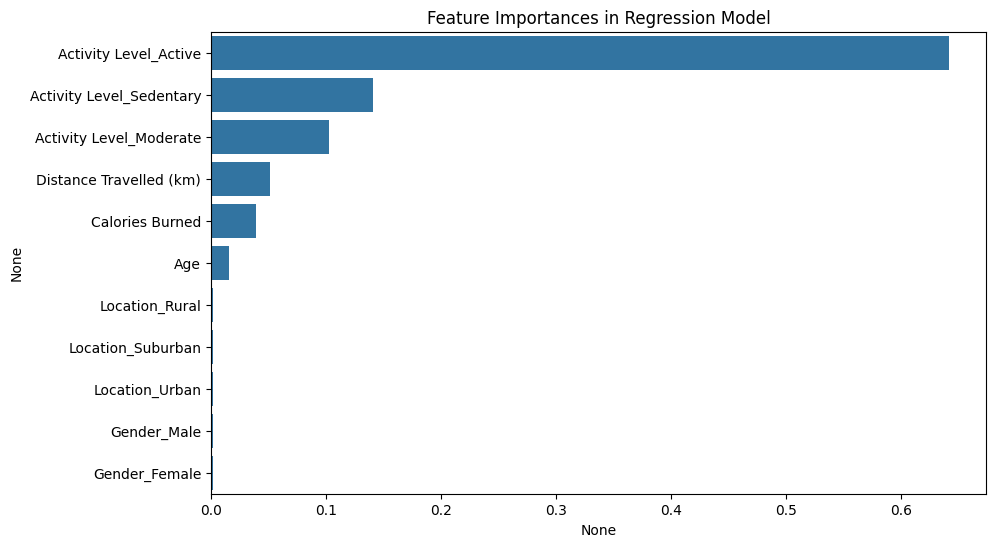

In [10]:
# Feature importance
feature_importances = pd.Series(regressor.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances in Regression Model')
plt.show()

In [11]:
# Classification Model (categorizing app sessions)
bins = [0, 90, 150, dataset['App Sessions'].max()]
labels = ['Low', 'Medium', 'High']
dataset['App Usage Category'] = pd.cut(dataset['App Sessions'], bins=bins, labels=labels, include_lowest=True)

y_classification = dataset['App Usage Category']
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_cls, y_train_cls)
y_pred_cls = classifier.predict(X_test_cls)

In [12]:
# Classification Model Evaluation
accuracy = accuracy_score(y_test_cls, y_pred_cls)
precision = precision_score(y_test_cls, y_pred_cls, average='weighted')
recall = recall_score(y_test_cls, y_pred_cls, average='weighted')
print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

Accuracy: 0.945, Precision: 0.9453001443001442, Recall: 0.945


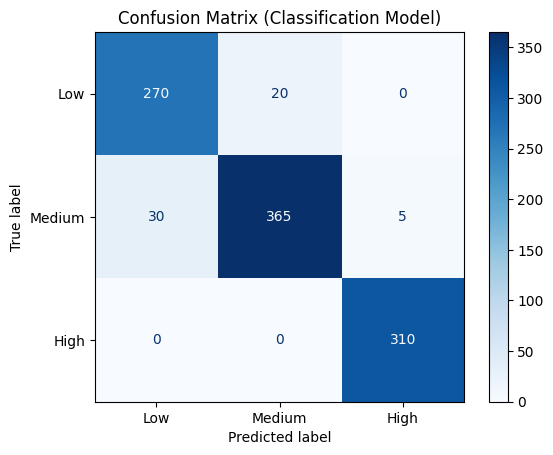

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test_cls, y_pred_cls, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Classification Model)')
plt.show()